# BIOS512 Assignment #5

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse') 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
wind = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv'
    )
wind |> head()

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

In [17]:
wind_province = wind |> pull(province_territory)
wind_province |> factor() |> levels()
#wind_province |> fct_infreq()
wind_province |> table()

[1] "Alberta"                   "British Columbia"         
 [3] "Manitoba"                  "New Brunswick"            
 [5] "Newfoundland and Labrador" "Northwest Territories"    
 [7] "Nova Scotia"               "Ontario"                  
 [9] "Prince Edward Island"      "Quebec"                   
[11] "Saskatchewan"              "Yukon"

wind_province
                  Alberta          British Columbia                  Manitoba 
                      900                       292                       133 
            New Brunswick Newfoundland and Labrador     Northwest Territories 
                      119                        27                         4 
              Nova Scotia                   Ontario      Prince Edward Island 
                      310                      2663                       104 
                   Quebec              Saskatchewan                     Yukon 
                     1991                       153                         2 

In [48]:
wind2 = wind |> 
    group_by(province_territory) |> 
    mutate(province_freq = n()) |> 
    ungroup() |> 
    arrange(desc(province_freq)) |> #arrange in descending order - with higher freq at the top
    mutate(province_territory = province_territory |> fct_inorder()) #sort in order 
    

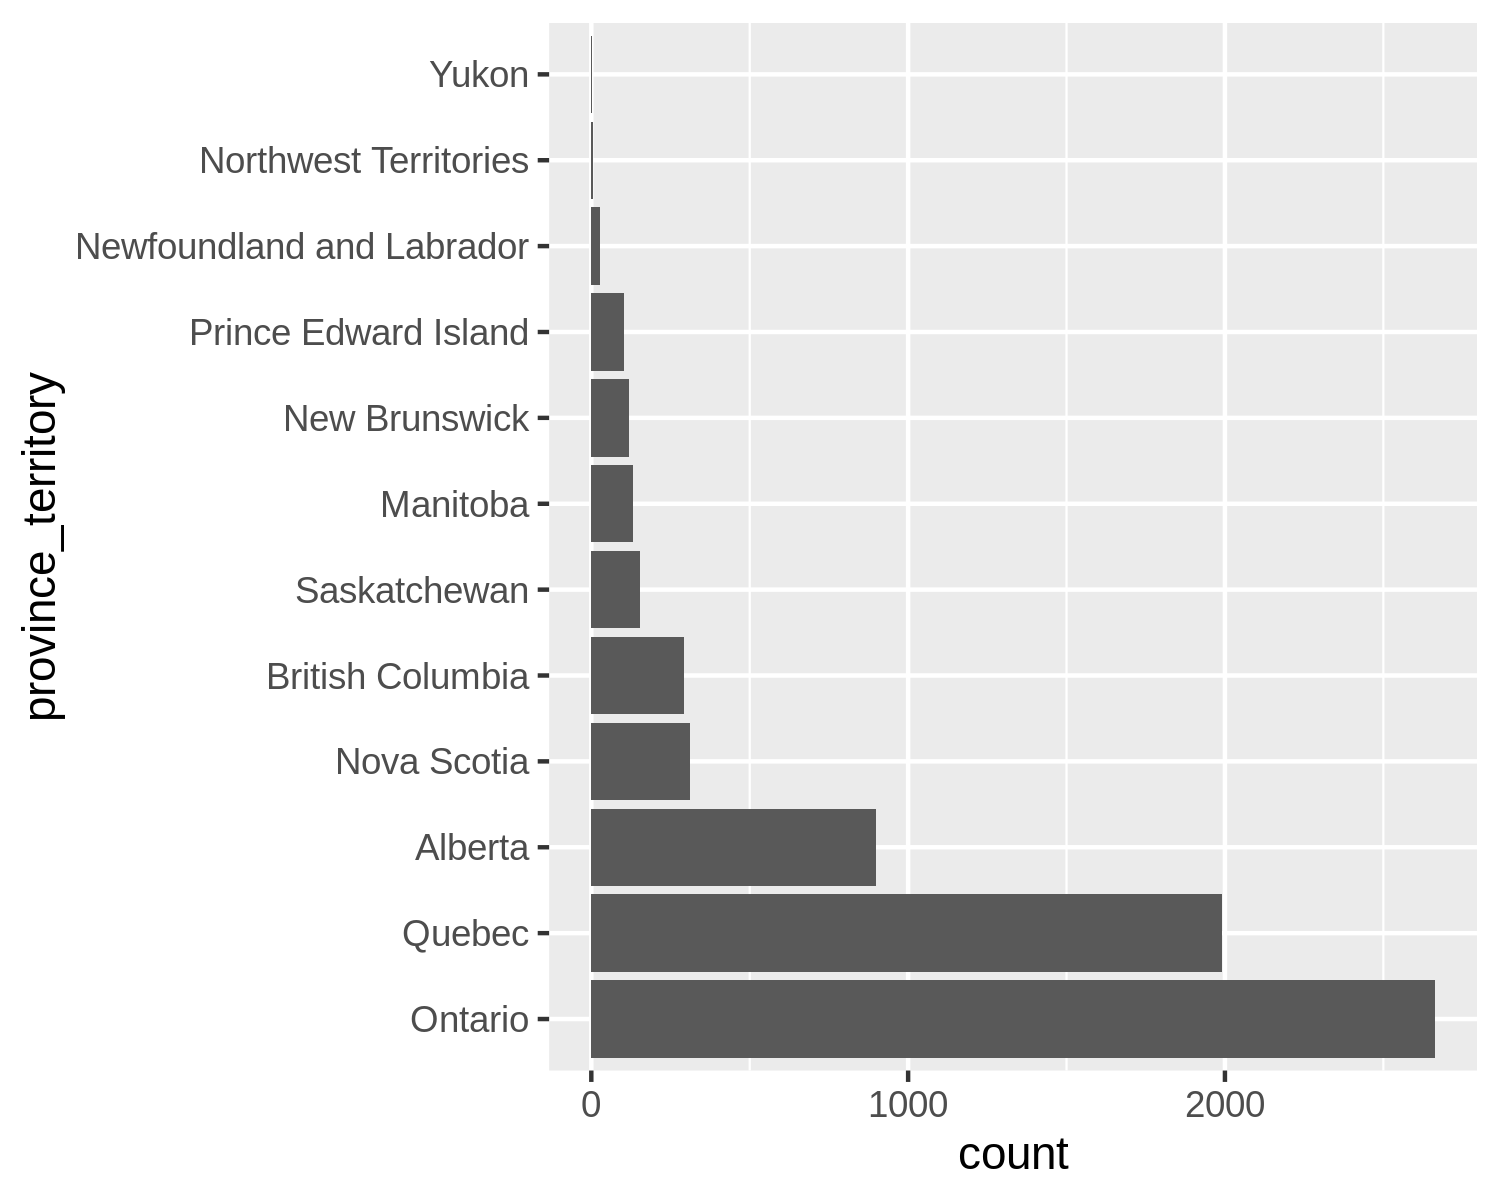

In [54]:
p = ggplot(data = wind2, aes(y = province_territory)) + 
    geom_bar()  
p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [75]:
wind3 = wind |> pull(manufacturer)

wind3 |> factor() |> levels()

wind3 |> table()

wind3 |> fct_lump(n = 8) |> fct_infreq() |> levels()

#wind |> count(manufacturer)


[1] "Acciona"                  "Acciona Wind Power"      
 [3] "Bonus"                    "DeWind"                  
 [5] "Enercon"                  "EWT"                     
 [7] "Gamesa"                   "GE"                      
 [9] "Lagerwey"                 "Leitwind"                
[11] "NEG Micon"                "Nordex"                  
[13] "Northwind"                "Pfleiderer"              
[15] "Samsung Renewable Energy" "Senvion"                 
[17] "Siemens"                  "Suzlon"                  
[19] "Tacke"                    "Turbowinds"              
[21] "Vensys"                   "Vestas"                  
[23] "Windmatic"

wind3
                 Acciona       Acciona Wind Power                    Bonus 
                      34                       40                        2 
                  DeWind                  Enercon                      EWT 
                       5                      960                        2 
                  Gamesa                       GE                 Lagerwey 
                       8                     1725                        2 
                Leitwind                NEG Micon                   Nordex 
                       1                      132                       20 
               Northwind               Pfleiderer Samsung Renewable Energy 
                       3                        1                        4 
                 Senvion                  Siemens                   Suzlon 
                     643                     1248                       15 
                   Tacke               Turbowinds                   Vensys 
      

[1] "Vestas"             "GE"                 "Siemens"           
[4] "Enercon"            "Senvion"            "NEG Micon"         
[7] "Other"              "Acciona Wind Power" "Acciona"

manufacturer,n
<chr>,<int>
Acciona,34
Acciona Wind Power,40
Bonus,2
DeWind,5
Enercon,960
EWT,2
Gamesa,8
GE,1725
Lagerwey,2


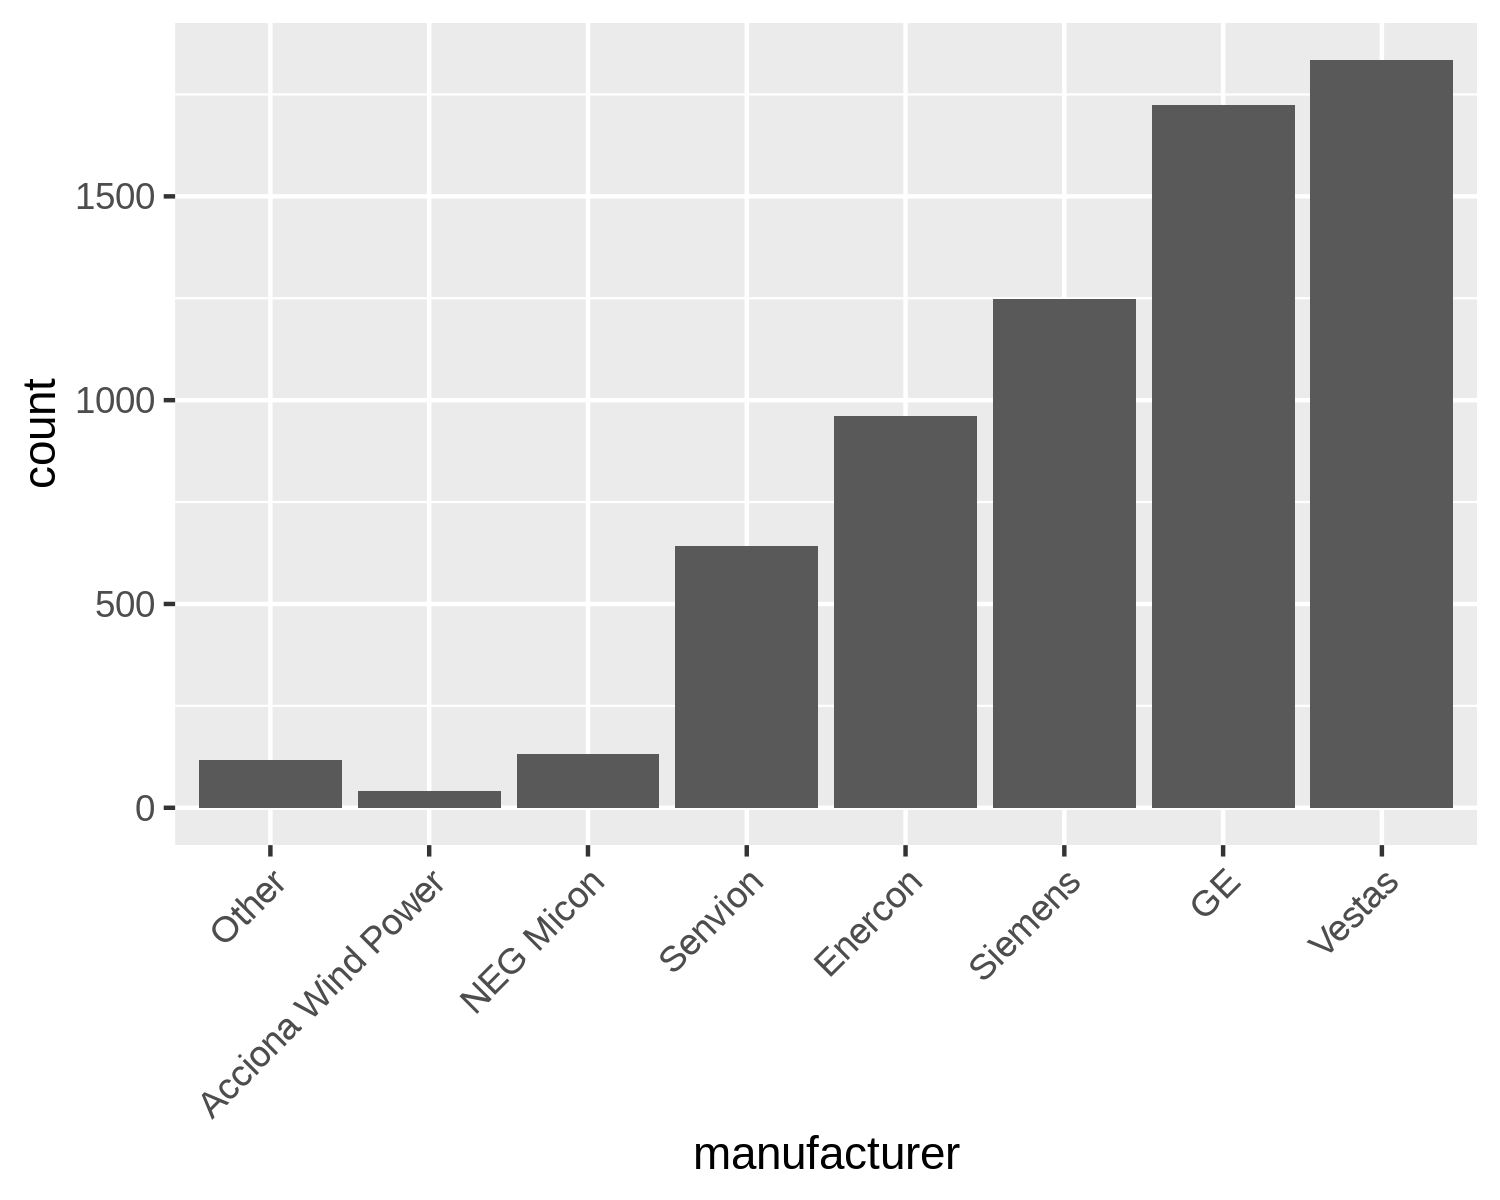

In [82]:
wind3 = wind |> 
    select(manufacturer) |> 
    mutate(manufacturer = manufacturer |> 
            fct_lump(n = 7) |> 
            fct_infreq() |> fct_rev() |> 
            fct_relevel('Other')
            ) 

p = ggplot(data = wind3, aes(x = manufacturer)) + 
    geom_bar() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
p